In [6]:
import matplotlib.pyplot as plt
import numpy as np
from lantern_fiber_utils import LanternFiber
from skimage.transform import resize, rescale
inp_pix_scale = 4

from constants import VALIDATION_COMPLEX_FIELDS_PATH

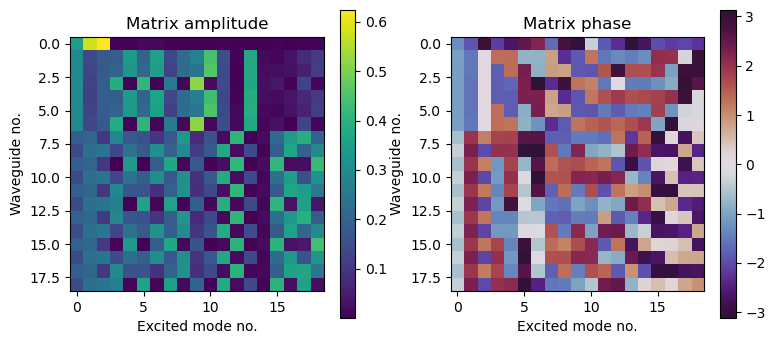

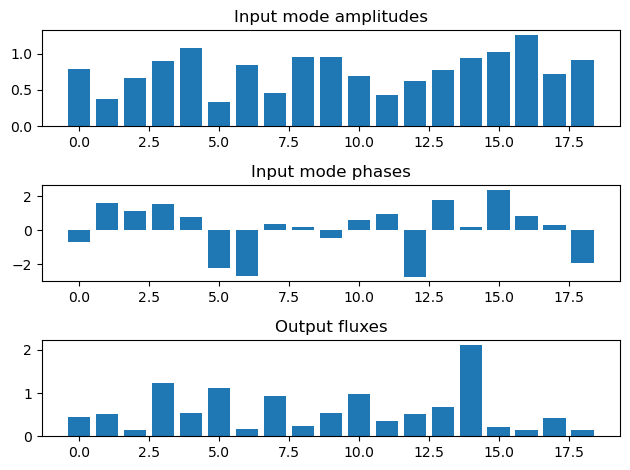

In [2]:
datadir = './'
probedata_filename = 'extractedvals_probeset_19LP__Good202107.npz'

f = LanternFiber(datadir=datadir, nmodes=19, nwgs=19)
f.load_savedvalues(probedata_filename)
f.make_transfer_matrix_mm2sm(show_plots=True)

transfer_matrix = f.Cmat # This is the complex transfer matrix

# These are the coefficients of the LP modes at the input. Here, just pick some random ones.
input_modecoeffs = np.random.uniform(-1, 1, f.nmodes) + 1j*np.random.uniform(-1, 1, f.nmodes)

# Now get the complex amplitudes of the PL outputs:
pl_outputs = transfer_matrix @ input_modecoeffs

# In real life, we just measure the intensities of the outputs:
pl_output_fluxes = np.abs(pl_outputs)**2



# Plot input mode coefficients and output fluxes
xlabels = np.arange(f.nmodes)
plt.figure(1)
plt.clf()
plt.subplot(311)
plt.bar(xlabels, np.abs(input_modecoeffs))
plt.title('Input mode amplitudes')
plt.subplot(312)
plt.bar(xlabels, np.angle(input_modecoeffs))
plt.title('Input mode phases')
plt.subplot(313)
plt.bar(xlabels, pl_output_fluxes)
plt.title('Output fluxes')
plt.tight_layout()

In [4]:
from data_utils import fuse_amplitude_and_phase, save_numpy_array

n_data_points = 100000

inputs = np.zeros((n_data_points, f.nmodes, 2))
outputs = np.zeros((n_data_points, pl_outputs.shape[0]))

for i in range(n_data_points):
    input_modecoeffs = np.random.uniform(-1, 1, f.nmodes) + 1j*np.random.uniform(-1, 1, f.nmodes)
    input_mode_amplitude = np.abs(input_modecoeffs)
    input_mode_phase = np.angle(input_modecoeffs)
    input_mode_amp_phase = fuse_amplitude_and_phase(input_mode_amplitude, input_mode_phase)
    inputs[i] = input_mode_amp_phase
    pl_outputs = transfer_matrix @ input_modecoeffs
    outputs[i] = np.abs(pl_outputs)**2

print(inputs.shape)
print(outputs.shape)
print(inputs[0])
print(outputs[0])

pl_outputs_filename = "../../Data/PSFReconstruction/outputflux.npy"
pl_inputs_filename = "../../Data/PSFReconstruction/inputs.npy"

save_numpy_array(inputs, pl_inputs_filename)
save_numpy_array(outputs, pl_outputs_filename)

(100000, 19, 2)
(100000, 19)
[[ 0.67131468 -0.22483464]
 [ 1.0775399   2.53867328]
 [ 0.53145831  0.97519614]
 [ 0.27756747 -2.06767127]
 [ 0.6851973  -1.58031094]
 [ 0.8500389  -0.43235318]
 [ 0.68336253  0.40607657]
 [ 0.55282394  1.77276105]
 [ 1.03281787 -2.4254411 ]
 [ 0.68768885  2.34633228]
 [ 0.91656256 -0.47962513]
 [ 0.73294546 -2.34394846]
 [ 0.93641903 -1.58161693]
 [ 1.29366719  2.28761213]
 [ 1.10121808 -0.61382438]
 [ 0.43184729 -0.96513781]
 [ 1.16967404  2.18638637]
 [ 0.80425246  0.73830689]
 [ 0.88918136 -1.9129636 ]]
[0.07136646 2.76173761 0.44538403 0.26226862 0.28303534 0.0168434
 0.96860557 0.02707414 0.23458928 0.65537522 0.0102895  1.93106664
 0.96066346 1.08091279 1.18424886 0.0473706  0.54433301 0.29406866
 0.55925384]
